In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
93,7.00,30.0,0
163,6.77,42.0,1
841,7.45,27.0,1
403,6.71,83.0,0
799,6.89,53.0,1


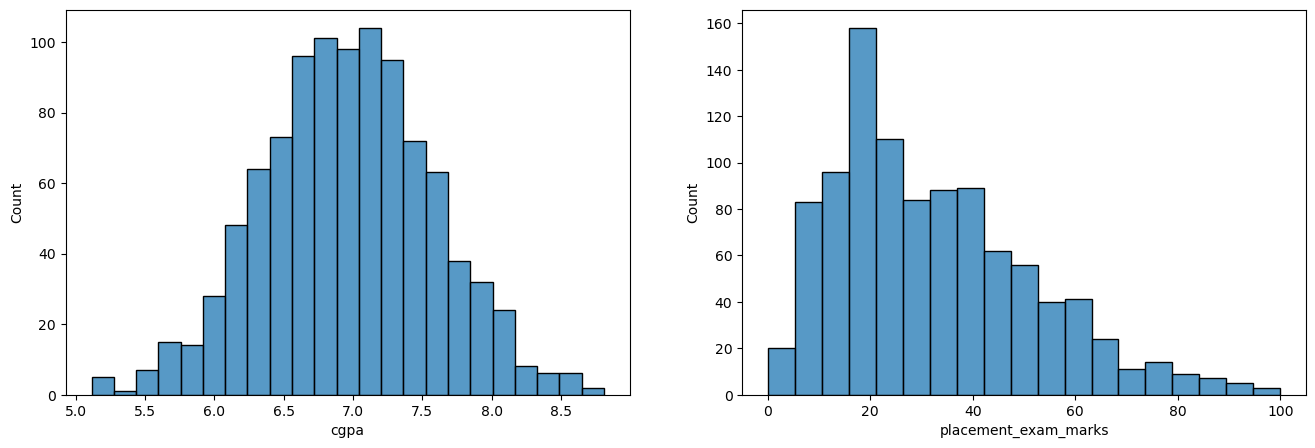

In [25]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [26]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [27]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.961498506374602
Std value of cgpa 0.6126883592648873
Min value of cgpa 5.113546374602832
Max value of cgpa 8.808933625397168


In [28]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.799563584169265
Lowest allowed 5.123433428579941


In [29]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062


## Trimming

In [30]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
993,6.730000,21.0,1,-0.375452
994,6.480000,63.0,0,-0.781363
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [31]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [32]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.372949
1,7.46,38.0,1,0.813630
2,7.54,40.0,1,0.944202
3,6.42,8.0,1,-0.883807
4,7.23,17.0,0,0.438235


In [33]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.808934,44.0,1,3.015293
996,8.808934,65.0,1,3.015293


In [34]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,5.113546,44.0,1,-3.016137
997,5.113546,34.0,0,-3.016137
999,5.113546,10.0,1,-3.016137


In [35]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,5.113546,44.0,1,-3.016137
995,8.808934,44.0,1,3.015293
996,8.808934,65.0,1,3.015293
997,5.113546,34.0,0,-3.016137
999,5.113546,10.0,1,-3.016137


In [36]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [37]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.372949
1,7.46,38.0,1,0.813630
2,7.54,40.0,1,0.944202
3,6.42,8.0,1,-0.883807
4,7.23,17.0,0,0.438235
...,...,...,...,...
991,7.04,57.0,0,0.128126
992,6.26,12.0,0,-1.144952
993,6.73,21.0,1,-0.377841
994,6.48,63.0,0,-0.785878


## Capping

In [38]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [39]:
lower_limit

5.123433428579941

In [40]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [41]:
df.shape

(1000, 4)

In [42]:
df['cgpa'].describe()

count    1000.000000
mean        6.961509
std         0.612543
min         5.123433
25%         6.550000
50%         6.960000
75%         7.370000
max         8.799564
Name: cgpa, dtype: float64